## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [30]:
reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

display(reviews.head())
display(Y.head())

,0
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


,0
0,1
1,0
2,1
3,0
4,1


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

## Vectorizing text and spliting into train test validate

In [31]:
vectorizer = CountVectorizer(max_features=10000)

X = vectorizer.fit_transform(reviews[0]).toarray()

In [32]:
X_, X_test, y_, y_test = train_test_split(X, Y, train_size=.8, random_state=504)
X_train, X_validate, y_train, y_validate = train_test_split(X_, y_, train_size=.75, random_state=504)

## Review exploration

## Training and validation

In [39]:
ann = tf.keras.Sequential([
    layers.Dense(units=50, input_dim=X.shape[1], activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

ann.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy']) 

/Users/asilins/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = ann.fit(X_train, y_train, epochs = 100, validation_data=(X_validate, y_validate), callbacks=[es])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8064 - loss: 0.4333 - val_accuracy: 0.8872 - val_loss: 0.2853
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1544 - val_accuracy: 0.8748 - val_loss: 0.3356
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.0854 - val_accuracy: 0.8676 - val_loss: 0.4130
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0541 - val_accuracy: 0.8658 - val_loss: 0.5957
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0297 - val_accuracy: 0.8726 - val_loss: 0.6648
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.8660 - val_loss: 0.7274
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0307 - val_accuracy: 0.8684 - val_loss: 0.9613
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0236 - val_accu

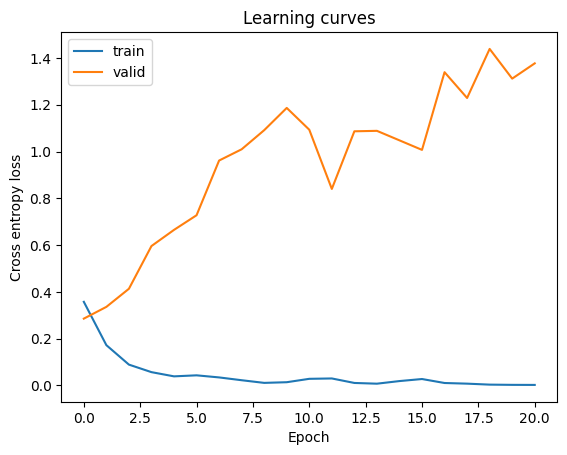

In [41]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

## Testing with own text

In [45]:
test_text = [
    "hate",
    "like",
    "I love this movie",
    "I hate this movie",
    "This movies is amazing, said no one",
    "How can you hate on this movie?"
]

test_X = vectorizer.transform(test_text).toarray()

In [46]:
predictions = ann.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int).flatten()

for text, label in zip(test_text, predicted_labels):
    sentiment = 'positive' if label == 1 else 'negative'
    print(f"Text: {text} -> Sentiment: {sentiment}")

Text: hate -> Sentiment: negative
Text: like -> Sentiment: positive
Text: I love this movie -> Sentiment: negative
Text: I hate this movie -> Sentiment: negative
Text: This movies is amazing, said no one -> Sentiment: negative
Text: How can you hate on this movie? -> Sentiment: negative
